In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 #image operations lib

DATADIR = r"C:\Users\Alan\pyver\Projects\VirtualEnv\Deep_Learning\Datasets\ASL\asl_alphabet_train"
CATEGORIES = [
    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
    'space','nothing', 
]

In [3]:
IMG_SIZE = 200

In [5]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #each category is an int
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #greyscale for less computation
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception:
                pass
    return training_data
     
training_data = create_training_data()
print(len(training_data))



84000


[array([[ 30,  28,  31, ...,  28,  32,  26],
       [ 29,  28,  32, ...,  31,  26,  34],
       [ 27,  31,  47, ..., 186, 182,  26],
       ...,
       [ 32,  25, 142, ..., 137, 139,  27],
       [ 28,  31, 138, ..., 140, 131,  32],
       [ 28,  30,  28, ...,  29,  32,  27]], dtype=uint8), 0]


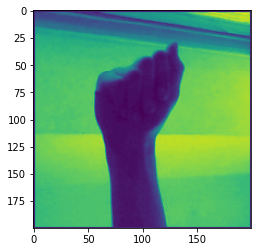

In [13]:
plt.imshow(training_data[0][0])
print(training_data[0])

In [14]:
import random

random.shuffle(training_data) #make sure data is random, so order of list does not affect training

In [15]:
X = [features for features, _     in training_data]
y = [label    for _       , label in training_data]

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #convert data to readable format for tf/keras
y = np.array(y)

In [16]:
#save data
import pickle

with open("X.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)
    
with open("y.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)
    
